In [29]:
import pandas as pd
import numpy as np
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


   Id                                             Review  Label
0   0                               good and interesting      5
1   1  This class is very helpful to me. Currently, I...      5
2   2  like!Prof and TAs are helpful and the discussi...      5
3   3  Easy to follow and includes a lot basic and im...      5
4   4  Really nice teacher!I could got the point eazl...      4
Id        0
Review    0
Label     0
dtype: int64
(107018, 3)


array([[<Axes: title={'center': 'Label'}>]], dtype=object)

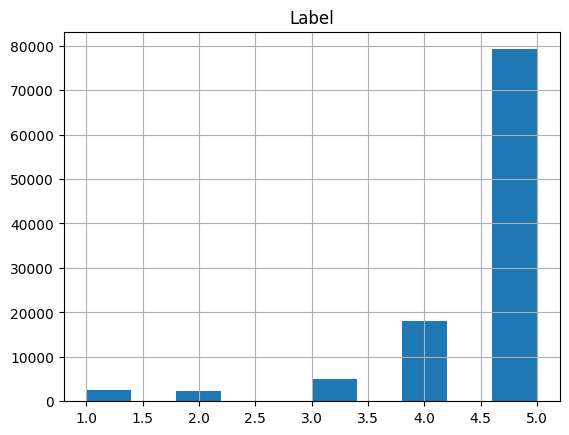

In [30]:
df = pd.read_csv('reviews.csv')
print(df.head())
print(df.isnull().sum())
print(df.shape)
df.hist(column='Label')

In [31]:
df['Label'] = df['Label'].apply(lambda x: 1 if x >= 4 else 0)

In [32]:
df['Label'].value_counts()

Label
1    97227
0     9791
Name: count, dtype: int64

In [33]:
minority = df[df['Label'] == 0]
majority = df[df['Label'] == 1]
majority_sampled = majority.sample(n=len(minority), random_state=42)
df = pd.concat([majority_sampled, minority])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
print(df[df['Review'] == ''])

Empty DataFrame
Columns: [Id, Review, Label]
Index: []


In [35]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs',
    'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
    't', 'can', 'will', 'just', 'don', 'should', 'now'
])

In [36]:
stemmer = SnowballStemmer('english')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

df['Review'] = df['Review'].apply(clean_text)

In [37]:
df.head()

,Id,Review,Label
0,2765,passion lectur dryness ethic superior pride th...,0
1,95432,cours decent introduct use python panda data s...,0
2,62126,interest,0
3,90362,found concept bee present general dedic specif...,1
4,89461,simpli amaz tough realli good,1


In [38]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Review'])
y = df['Label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [43]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1990
           1       0.84      0.84      0.84      1927

    accuracy                           0.84      3917
   macro avg       0.84      0.84      0.84      3917
weighted avg       0.84      0.84      0.84      3917

[[1688  302]
 [ 313 1614]]


In [ ]:
df_report[['precision', 'recall', 'f1-score']].plot(kind='barh')

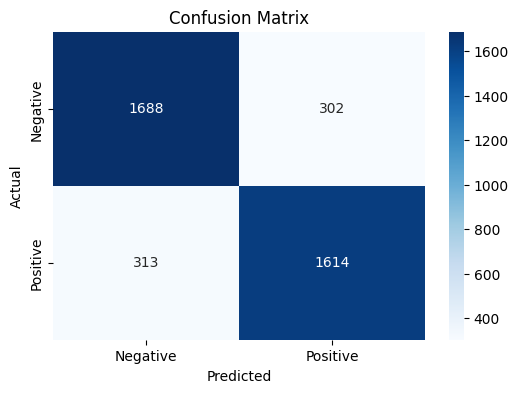

In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<Figure size 800x400 with 0 Axes>

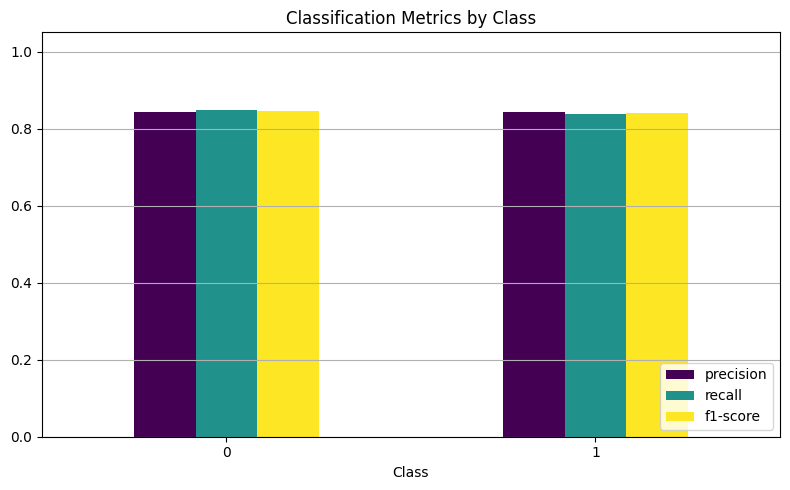

In [55]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:2]

plt.figure(figsize=(8, 4))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("Classification Metrics by Class")
plt.xlabel("Class")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [44]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    prediction = nb.predict(vector)[0]
    return prediction


In [51]:
reviews = [
    'this course was boring i didnt like it',
    'really liked the course and the teacher was very kind',
    'not enough resources',
    'professor conducted everything well and smooth'
]
for review in reviews:
    if predict_sentiment(review):
        print(f"review: '{review}' is positive!")
    else:
        print(f"review: '{review}' is negative!")

review: 'this course was boring i didnt like it' is negative!
review: 'really liked the course and the teacher was very kind' is positive!
review: 'not enough resources' is negative!
review: 'professor conducted everything well and smooth' is positive!
